In [13]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load a subset with 1000 instances of the MNIST digits dataset
digits = pd.read_csv('digits.csv')
digits_sample = digits.sample(1500, random_state=1234)

In [3]:
# Subset input and output features
X = digits_sample.iloc[:,:-1]
y = digits_sample[['class']]

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [15]:
# Build a pipeline that fits an PCA model to the scaled training data
scaler = MinMaxScaler()
pca = PCA(n_components=2, random_state=123)
pipeline_pca = Pipeline(steps=[('scaler',scaler),('pca',pca)])
X_transformed = pipeline_pca.fit_transform(X_train, np.ravel(y_train))
X_transformed

array([[ 0.11422718, -0.10172533],
       [-0.42355929,  4.01930763],
       [ 0.18888648,  3.35518219],
       ...,
       [-1.50047247,  0.64492062],
       [-0.44939958, -0.28858616],
       [-2.19981968,  0.2411423 ]])

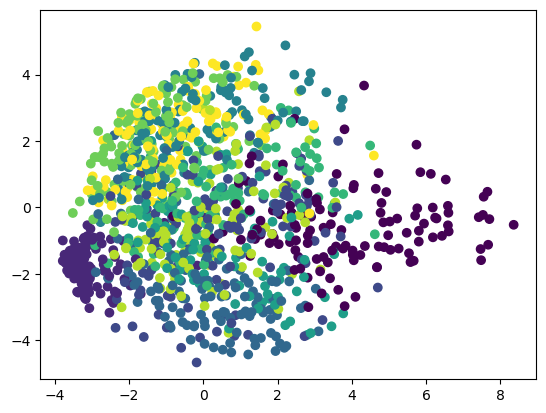

In [26]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plt.scatter(x=X_transformed[:,0], y=X_transformed[:,1], c=np.ravel(y_train), cmap='viridis')

In [7]:
# Build a pipeline that fits an MDS model to the scaled training data
mds = MDS(n_components=2, random_state=1234, normalized_stress='auto')
pipeline_mds = Pipeline(steps=[('scaler',scaler),('mds',mds)])
X_transform_mds = pipeline_mds.fit_transform(X_train)

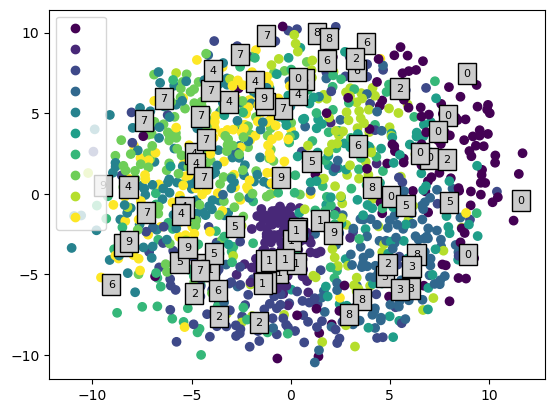

In [29]:
# Plot the MDS mapping
fig, plot = plt.subplots()
plt.prism()
scatter = plot.scatter(X_transform_mds[:, 0], X_transform_mds[:, 1], c=np.ravel(y_train), cmap='viridis')
plt.legend(handles=scatter.legend_elements()[0])
# Add labels
count=0
for label , x, y in zip(np.ravel(y_train), X_transform_mds[:, 0], X_transform_mds[:, 1]):
    if count % 15 == 0:
        plt.annotate(str(int(label)), xy=(x,y), color='black', size=8, 
                     bbox=dict(boxstyle='square,pad=0.5', fc='0.8'))
    count = count + 1

In [9]:
# Display the data points in lower-dimensional space
pd.DataFrame(mds.embedding_)

,0,1
0,-4.421796,-4.595805
1,-7.773519,2.698339
2,-6.868471,1.976820
3,5.898685,8.572290
4,6.328691,7.680462
...,...,...
1195,2.901287,5.950196
1196,-4.771754,-4.008260
1197,-5.770520,-2.147627
1198,2.275075,3.895467


In [10]:
# Display the dissimilarity matrix in the higher-dimensional space
pd.DataFrame(mds.dissimilarity_matrix_)

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,0.000000,9.876681,10.275774,10.031780,11.932514,10.719710,9.783532,9.869605,8.132775,9.333146,...,8.943995,11.611337,12.775709,9.695029,9.068436,9.824372,10.602899,7.973915,8.843704,9.476530
1,9.876681,0.000000,6.375913,12.690148,12.526686,9.990402,9.565244,11.142563,10.927284,10.432465,...,9.384910,9.777569,11.578347,10.751415,8.699078,10.449155,10.164685,9.424648,10.210915,9.516652
2,10.275774,6.375913,0.000000,12.072580,11.289658,9.326372,8.344214,10.270839,11.541141,10.887687,...,8.577123,10.296170,11.409497,10.131533,9.343076,9.637553,9.656895,9.949582,10.093200,10.103740
3,10.031780,12.690148,12.072580,0.000000,9.166893,11.042153,11.989426,12.674060,9.185301,10.994181,...,11.790182,12.565290,13.987172,11.384287,11.952269,10.859281,13.628617,11.739134,11.158231,12.620185
4,11.932514,12.526686,11.289658,9.166893,0.000000,11.194085,10.454727,11.601205,11.220686,11.747933,...,11.357625,12.905433,11.866257,10.530735,11.441155,8.786423,12.830554,11.882711,11.795784,11.979824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,9.824372,10.449155,9.637553,10.859281,8.786423,10.925029,9.085689,9.669498,8.967922,10.240855,...,9.534876,11.979218,11.565608,8.668588,8.677431,0.000000,10.996174,9.730995,9.732550,9.558946
1196,10.602899,10.164685,9.656895,13.628617,12.830554,11.139736,9.578231,9.720790,11.309631,10.247627,...,8.641528,11.351506,11.448506,10.818126,9.632722,10.996174,0.000000,9.941874,9.985782,9.231361
1197,7.973915,9.424648,9.949582,11.739134,11.882711,9.993036,9.521646,9.285879,10.212673,10.356184,...,8.746555,10.911072,12.998367,9.231111,8.465693,9.730995,9.941874,0.000000,10.380413,9.422431
1198,8.843704,10.210915,10.093200,11.158231,11.795784,10.649207,9.416839,9.497723,9.549144,9.224898,...,9.023913,11.696581,11.888463,9.515820,8.037557,9.732550,9.985782,10.380413,0.000000,8.203891


In [11]:
# Display the raw stress
mds.stress_

9865079.139413187

In [12]:
# Display the number of iterations that give the best stress
mds.n_iter_

300